In [1]:
import pandas as pd

In [2]:
# dictionary of the feature names
feature_dict = {i:label for i,label in zip(
              range(4),
              ('sepal length in cm', 
              'sepal width in cm', 
              'petal length in cm', 
              'petal width in cm', ))}

In [3]:
df = pd.read_csv('iris.csv' , sep=',')
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class label            object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

# convert pandas DataFrame to simple numpy arrays
X = df.iloc[:,:-1].values
y = df['class label'].values

# convert class labels from strings to integers
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

label_dict = {0:'Setosa',1:'Versicolor',2:'Virginica'}
attr_dict={0: 'sepal length',
           1: 'sepal width',
           2: 'petal length',
           3: 'petal width'}

## Pie chart

In [7]:
%matplotlib inline

In [8]:
from matplotlib import pyplot as plt
import numpy as np

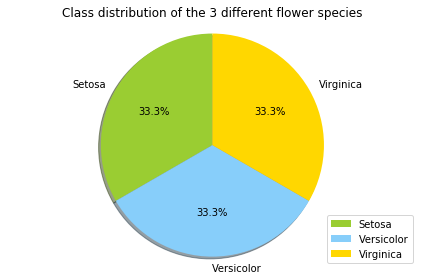

In [9]:
plt.pie(
    [X[y==i].shape[0] for i in range(3)], 
    labels = [label_dict[i] for i in range(3)],
    shadow = True,
    colors = ('yellowgreen', 'lightskyblue','gold'),
    startangle=90,
    autopct = '%1.1f%%'
    )
plt.legend(fancybox=True, loc='lower right')
plt.title('Class distribution of the 3 different flower species')
plt.axis('equal')     # plot pyplot as circle
plt.tight_layout()
plt.show()

## Bar plot

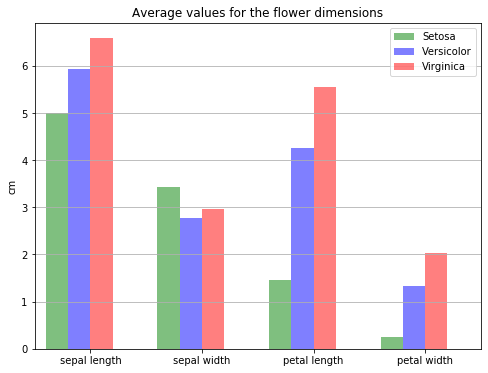

In [10]:
import matplotlib.pyplot as plt
mean_vals = [X[y==i,:].mean(axis=0) for i in range(3)]
labels = [attr_dict[i] for i in range(4)]

# setting the positions and width for the bars
pos = np.arange(4)
width = 0.2

# plotting the bars
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos, mean_vals[0], width,
       alpha = 0.5 ,
       color= 'g' ,
       label = labels[0])
plt.bar([p + width for p in pos], mean_vals[1], width,
                 alpha=0.5,
                 color='b',
                 label=labels[1])
plt.bar([p + width*2 for p in pos], mean_vals[2], width,
                 alpha=0.5,
                 color='r',
                 label=labels[2])
# Setting axis labels and ticks
ax.set_ylabel('cm')
ax.set_title('Average values for the flower dimensions')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)


# Adding the legend and showing the plot
plt.legend([label_dict[i] for i in range(3)], loc='upper right')

# adding horizontal grid lines 
ax.yaxis.grid(True) 

plt.show()

## Box plot

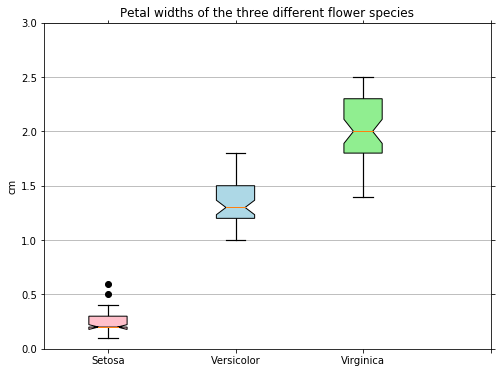

In [11]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

bplot = plt.boxplot([X[y==i,3] for i in range(3)],
        notch=True,          # notch shape 
        vert=True,           # vertical box aligmnent
        sym='ko',            # black circle for outliers
        patch_artist=True)   # fill with color
# choosing custom colors to fill the boxes
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# modifying the whiskers: straight lines, black, wider
for whisker in bplot['whiskers']:
    whisker.set(color='black', linewidth=1.2, linestyle='-')    
    
# making the caps a little bit wider 
for cap in bplot['caps']:
    cap.set(linewidth=1.2)
    
# hiding axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on")

# adding horizontal grid lines 
ax.yaxis.grid(True)

plt.xticks([y+1 for y in range(4)],
           [label_dict[i] for i in range(3)])
plt.ylim([0,3])

plt.title('Petal widths of the three different flower species')
plt.ylabel('cm')
plt.show()

## 1D Histogram¶

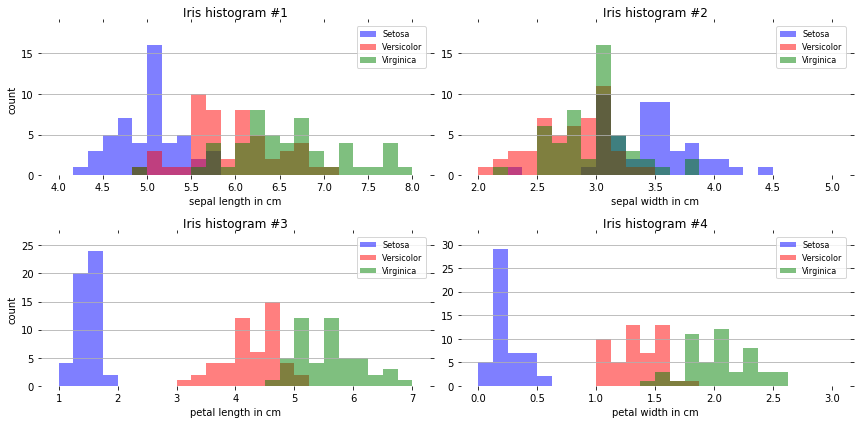

In [12]:
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(3), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col, 
                   label='%s' %label_dict[lab], 
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))
    
    # adding horizontal grid lines 
    ax.yaxis.grid(True)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()

plt.show()

## 2D Histogram

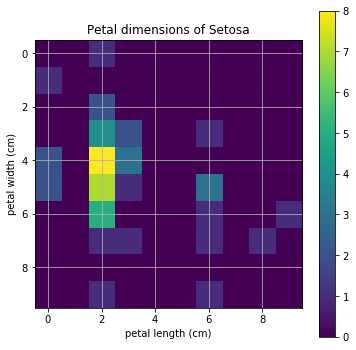

In [13]:
fig = plt.figure(figsize=(6,6))

hist, xedges, yedges = np.histogram2d(X[y==0,2], X[y==0,3])

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal dimensions of Setosa')
plt.imshow(hist)
plt.grid(True)
plt.colorbar()

plt.show()

## 3D Histogram

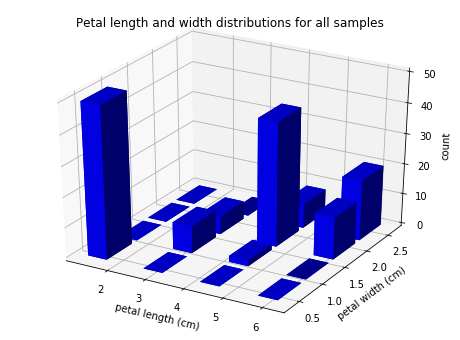

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
x1, y1 = np.copy(X[:,2]), np.copy(X[:,3])
hist, xedges, yedges = np.histogram2d(x1, y1, bins=4)

elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1]+0.25, yedges[:-1]+0.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_zlabel('count')
plt.title('Petal length and width distributions for all samples')

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

## Scatter plot

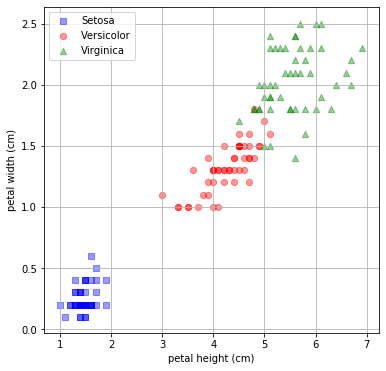

In [15]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

colors = ['blue', 'red', 'green']
markers = ['s', 'o', '^']

for lab, c, m in zip(range(3), colors, markers):
    ax.scatter(X[y==lab, 2], X[y==lab, 3], 
               c=c,      # color
               marker=m, # marker symbol
               s=40,     # markersize
               alpha=0.4, # transparency
               label=label_dict[lab]
               )

ax.set_xlabel('petal height (cm)')
ax.set_ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.grid()

plt.show()